In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sklearn

In [43]:
train_raw= pd.read_csv(r'C:\Users\CHIMEZIE AZIH\hamoye proj\20-restaurant-sales\20-restaurant-sales\data\train.csv')

In [44]:
test_raw= pd.read_csv(r'C:\Users\CHIMEZIE AZIH\hamoye proj\20-restaurant-sales\20-restaurant-sales\data\test.csv')

In [45]:
test_raw.shape
train_raw.shape

(137, 43)

In [46]:
test_raw.shape

(100000, 42)

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


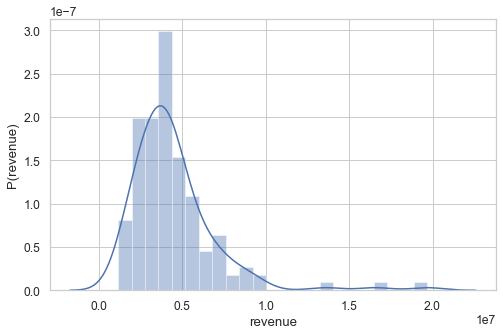

In [47]:
print(train_raw['revenue'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(train_raw['revenue'], norm_hist=False, kde=True).set(xlabel='revenue', ylabel='P(revenue)');

In [48]:
train_raw=train_raw[train_raw['revenue']< 10000000]

In [49]:
train_raw.shape

(134, 43)

count    1.340000e+02
mean     4.181438e+06
std      1.799596e+06
min      1.149870e+06
25%      2.994569e+06
50%      3.887614e+06
75%      5.001114e+06
max      9.652350e+06
Name: revenue, dtype: float64


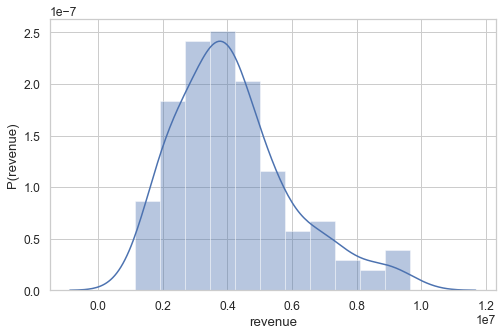

In [50]:
print(train_raw['revenue'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(train_raw['revenue'], norm_hist=False, kde=True).set(xlabel='revenue', ylabel='P(revenue)');

In [51]:
train_raw.City.unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [52]:
test_raw.City.unique()

array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

In [53]:
test_raw2= test_raw.copy()


test_index= test_raw2[(test_raw2.City == 'Kırıkkale') | (test_raw2.City == 'Mersin') | (test_raw2.City=='Rize') | (test_raw2.City =='Yalova') |
                      (test_raw2.City== 'Erzincan') | (test_raw2.City=='Bilecik') | (test_raw2.City=='Çorum') | (test_raw2.City=='Giresun') |
                      (test_raw2.City=='Zonguldak') | (test_raw2.City=='Mardin') | (test_raw2.City=='Nevşehir') | (test_raw2.City== 'Erzurum') |
                      (test_raw2.City== 'Aksaray') | (test_raw2.City== 'Malatya') | (test_raw2.City== 'Manisa') | (test_raw2.City=='Çanakkale') |
                      (test_raw2.City=='Sivas') | (test_raw2.City=='Kırşehir') | (test_raw2.City== 'Artvin') | (test_raw2.City== 'Batman') | 
                      (test_raw2.City=='Ordu') | (test_raw2.City== 'Tanımsız') | (test_raw2.City== 'Kars')  | (test_raw2.City=='Düzce') |
                      (test_raw2.City=='Kahramanmaraş') | (test_raw2.City=='Niğde') | (test_raw2.City== 'Siirt') | (test_raw2.City== 'Çankırı') |
                      (test_raw2.City== 'Hatay')].index

In [54]:
test_raw2.drop(test_index, inplace= True)

In [55]:
test_raw2.shape

(83757, 42)

In [56]:
test_raw2.Type.unique()

array(['IL', 'FC', 'DT', 'MB'], dtype=object)

In [57]:
train_raw.Type.unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [58]:
test_raw2= test_raw2[test_raw2['Type'] != 'MB']

In [59]:
import time
from datetime import datetime

test_raw2['Open Date']= pd.to_datetime(test_raw2['Open Date'])
train_raw['Open Date']= pd.to_datetime(train_raw['Open Date'])

In [60]:
test_raw2['Year']= test_raw2['Open Date'].dt.year
test_raw2['Month'] = test_raw2['Open Date'].dt.month
test_raw2['Day']= test_raw2['Open Date'].dt.day


In [61]:
train_raw['Year']= train_raw['Open Date'].dt.year
train_raw['Month'] = train_raw['Open Date'].dt.month
train_raw['Day']= train_raw['Open Date'].dt.day

In [62]:
train_raw.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,Year,Month,Day
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,4,5,5,4,3,4,5653753.0,1999,7,17
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,6923131.0,2008,2,14
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,2055379.0,2013,3,9
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,10,6,18,12,12,6,2675511.0,2012,2,2
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3,2,3,4,3,3,4316715.0,2009,5,9


In [63]:
test_raw2.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,Year,Month,Day
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2011,3,18
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2013,10,30
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,4,0,0,0,0,0,0,2013,5,6
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,0,0,0,0,0,0,0,2013,7,31
5,5,2007-11-29,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,...,0,0,0,0,0,0,0,2007,11,29


In [64]:
train_pro= train_raw.drop(columns= ['Id','Open Date', 'Month','Day'])

In [65]:
train_pro.shape

(134, 42)

In [66]:
train_pro.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,2009


In [67]:
test_raw2.shape

(83567, 45)

In [68]:
test_pro= test_raw2.drop(columns= ['Id','Open Date', 'Month','Day'])

In [69]:
test_pro.shape

(83567, 41)

In [70]:
train_en= pd.get_dummies(train_pro)

In [71]:
x= train_en.drop(columns= 'revenue')
y= train_en['revenue']

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state= 42)

In [73]:
x_train.shape

(100, 77)

In [74]:
x_test.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
130,3,4.0,3.0,4.0,2,1,5,5,5,5,...,0,0,0,0,0,0,1,0,1,0
67,4,5.0,4.0,5.0,2,4,5,4,4,4,...,0,0,1,0,0,1,0,0,1,0
107,4,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,0,0,0,1,0,0,1
20,3,4.0,4.0,4.0,2,2,5,4,5,5,...,0,0,0,0,0,0,1,0,0,1
43,2,4.0,5.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,1,0,0,1,0


In [75]:
x_train.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
68,2,4.0,3.0,4.0,2,3,5,5,5,4,...,0,0,1,0,0,1,0,0,0,1
56,4,5.0,4.0,4.0,2,2,5,4,4,4,...,0,0,1,0,0,1,0,0,0,1
25,4,4.0,5.0,5.0,2,2,5,5,5,5,...,0,0,0,0,0,0,1,0,1,0
57,2,3.0,4.0,3.0,1,4,5,5,5,5,...,0,0,0,0,0,0,1,0,1,0
120,2,3.0,4.0,4.0,2,2,5,4,5,5,...,0,0,0,0,0,0,1,0,1,0


In [76]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

In [77]:
data_dmat= xgb.DMatrix(data= x_train, label= y_train) 

In [78]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [79]:
training= xg_reg.fit(x_train, y= y_train)

[22:58:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
pred= xg_reg.predict(x_test)

In [81]:
pred

array([2653672. , 3106840.8, 2565811. , 3015692. , 2602237.5, 3143696.2,
       1951216.6, 2784522.8, 2640306.5, 2532422.2, 2590845.8, 2836451.2,
       2869391.2, 2863424.5, 2152603.8, 2456265.5, 3012790. , 2545915. ,
       2141581. , 3125228.5, 2252297.5, 2863424.5, 2705346.5, 2653672. ,
       2489487.2, 2640306.5, 2935718.5, 3038047.5, 1594279.4, 2559280.5,
       2213673. , 3075506. , 2418573. , 2801108.5], dtype=float32)

In [82]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 2336746.808699


In [83]:
r2= r2_score(y_test, pred)
r2

-0.5254551261997076

In [84]:
from xgboost import cv

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmat, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.151154e+06,74304.759832,4.152246e+06,174343.371878
1,3.808984e+06,68663.290106,3.826526e+06,179366.754265
2,3.499914e+06,61539.507130,3.538322e+06,176631.405434
3,3.229688e+06,55345.537528,3.291228e+06,176281.914698
4,2.988159e+06,45376.238702,3.062554e+06,173660.523243
5,2.764948e+06,37879.156004,2.885271e+06,169826.259022
6,2.574661e+06,32729.661731,2.716014e+06,159326.677409
7,2.390504e+06,30162.667283,2.583849e+06,148381.619304
8,2.220478e+06,30219.972622,2.460462e+06,152530.234081
9,2.070294e+06,29998.174790,2.363863e+06,140885.136144


In [86]:
r2_score(y_test, pred)

-0.5254551261997076